In [70]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
import graphviz

In [71]:
creditx = pd.read_csv('c:/users/sully/desktop/C5 T1/default of credit card clients.csv', skiprows=1)
creditx.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [72]:
creditx = creditx.rename(columns={"default payment next month": "default_payment_next_month"})

In [73]:
creditx.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [74]:
#credit_stats = creditx.describe()
#credit_stats.to_csv('c:/users/sully/desktop/C5 T1/credit_stats.csv')

In [75]:
creditx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [76]:
creditx['SEX'] = pd.Categorical(creditx.SEX)
creditx['MARRIAGE'] = pd.Categorical(creditx.MARRIAGE)
creditx['EDUCATION'] = pd.Categorical(creditx.EDUCATION)
creditx['default_payment_next_month'] = pd.Categorical(creditx.default_payment_next_month)

In [77]:
# calculate Pearson's correlation
creditx.corr()

,ID,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
ID,1.000000,0.026179,0.018678,-0.030575,-0.011215,-0.018494,-0.002735,-0.022199,-0.020270,0.019389,...,0.024354,0.040351,0.016705,0.016730,0.009742,0.008406,0.039151,0.007793,0.000652,0.003000
LIMIT_BAL,0.026179,1.000000,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,-0.235195,0.285430,...,0.283236,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595
AGE,0.018678,0.144713,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,-0.048773,0.056239,...,0.053710,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478
PAY_0,-0.030575,-0.271214,-0.039447,1.000000,0.672164,0.574245,0.538841,0.509426,0.474553,0.187068,...,0.179785,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673
PAY_2,-0.011215,-0.296382,-0.050148,0.672164,1.000000,0.766552,0.662067,0.622780,0.575501,0.234887,...,0.224146,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500
PAY_3,-0.018494,-0.286123,-0.053048,0.574245,0.766552,1.000000,0.777359,0.686775,0.632684,0.208473,...,0.227494,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861
PAY_4,-0.002735,-0.267460,-0.049722,0.538841,0.662067,0.777359,1.000000,0.819835,0.716449,0.202812,...,0.244983,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565
PAY_5,-0.022199,-0.249411,-0.053826,0.509426,0.622780,0.686775,0.819835,1.000000,0.816900,0.206684,...,0.243335,0.271915,0.269783,0.262509,-0.006089,-0.003191,0.009062,-0.058299,-0.033337,-0.023027
PAY_6,-0.020270,-0.235195,-0.048773,0.474553,0.575501,0.632684,0.716449,0.816900,1.000000,0.207373,...,0.241181,0.266356,0.290894,0.285091,-0.001496,-0.005223,0.005834,0.019018,-0.046434,-0.025299
BILL_AMT1,0.019389,0.285430,0.056239,0.187068,0.234887,0.208473,0.202812,0.206684,0.207373,1.000000,...,0.892279,0.860272,0.829779,0.802650,0.140277,0.099355,0.156887,0.158303,0.167026,0.179341


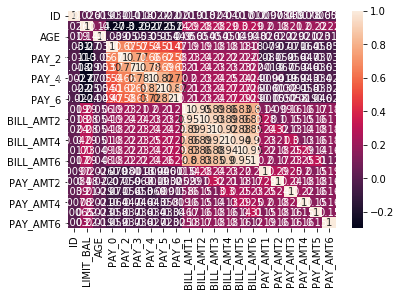

In [78]:
corrMatrix = creditx.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [79]:
#corrMatrix.to_csv('c:/users/sully/desktop/C5 T1/dccc.csv')

In [80]:
# In examining correlations, it is clear that the monthly bills are well correlated month to month, 
# and the payments per month are well correlated month to month. 

In [81]:
creditx['Pay_code_avg'] = creditx[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].mean(axis=1)
creditx['Bill_avg'] = creditx[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].mean(axis=1)
creditx['Pay_avg'] = creditx[['PAY_AMT1', 'PAY_AMT1', 'PAY_AMT1', 'PAY_AMT1', 'PAY_AMT1', 'PAY_AMT1']].mean(axis=1)

In [82]:
creditxx = creditx.drop(['BILL_AMT1','BILL_AMT2', 'BILL_AMT3','BILL_AMT4', 'BILL_AMT5','BILL_AMT6',
                        'PAY_AMT1','PAY_AMT2', 'PAY_AMT3','PAY_AMT4', 'PAY_AMT5','PAY_AMT6',
                        'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'], axis=1)

(array([7.0000e+00, 1.9276e+04, 5.6400e+03, 2.3270e+03, 1.3040e+03,
        6.9700e+02, 3.2700e+02, 1.8500e+02, 9.5000e+01, 6.4000e+01,
        4.1000e+01, 2.6000e+01, 7.0000e+00, 3.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([-56043.16666667,  -9375.31666667,  37292.53333333,  83960.38333333,
        130628.23333333, 177296.08333333, 223963.93333333, 270631.78333333,
        317299.63333333, 363967.48333333, 410635.33333333, 457303.18333333,
        503971.03333333, 550638.88333333, 597306.73333333, 643974.58333333,
        690642.43333333, 737310.28333333, 783978.13333333, 830645.98333333,
        877313.83333333]),
 <a list of 20 Patch objects>)

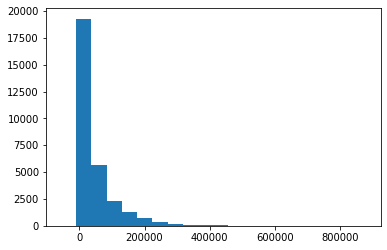

In [83]:
plt.hist(creditxx['Bill_avg'], bins=20)

(array([2.9458e+04, 3.4400e+02, 1.0000e+02, 4.2000e+01, 2.2000e+01,
        1.9000e+01, 8.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00,
        0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([     0. ,  43677.6,  87355.2, 131032.8, 174710.4, 218388. ,
        262065.6, 305743.2, 349420.8, 393098.4, 436776. , 480453.6,
        524131.2, 567808.8, 611486.4, 655164. , 698841.6, 742519.2,
        786196.8, 829874.4, 873552. ]),
 <a list of 20 Patch objects>)

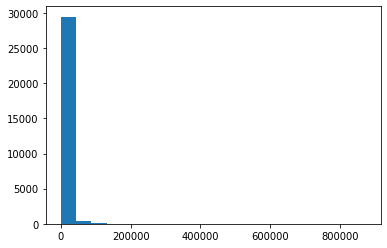

In [84]:
plt.hist(creditxx['Pay_avg'], bins=20)

(array([2.4900e+03, 1.3560e+03, 4.1830e+03, 2.2240e+03, 2.4220e+03,
        1.2373e+04, 1.3700e+03, 1.2920e+03, 6.7300e+02, 4.8400e+02,
        8.2500e+02, 1.0300e+02, 5.8000e+01, 3.6000e+01, 1.1000e+01,
        1.0000e+01, 3.9000e+01, 1.1000e+01, 3.9000e+01, 1.0000e+00]),
 array([-2. , -1.6, -1.2, -0.8, -0.4,  0. ,  0.4,  0.8,  1.2,  1.6,  2. ,
         2.4,  2.8,  3.2,  3.6,  4. ,  4.4,  4.8,  5.2,  5.6,  6. ]),
 <a list of 20 Patch objects>)

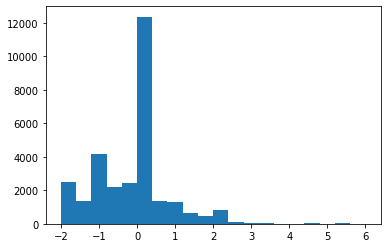

In [85]:
plt.hist(creditxx['Pay_code_avg'], bins=20)

In [88]:
creditxx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   ID                          30000 non-null  int64   
 1   LIMIT_BAL                   30000 non-null  int64   
 2   SEX                         30000 non-null  category
 3   EDUCATION                   30000 non-null  category
 4   MARRIAGE                    30000 non-null  category
 5   AGE                         30000 non-null  int64   
 6   default_payment_next_month  30000 non-null  category
 7   Pay_code_avg                30000 non-null  float64 
 8   Bill_avg                    30000 non-null  float64 
 9   Pay_avg                     30000 non-null  float64 
dtypes: category(4), float64(3), int64(3)
memory usage: 1.5 MB


In [94]:
pd.cut(creditxx['LIMIT_BAL'], bins=4, right=True, retbins=True, precision=1, include_lowest=False)

(0        (9010.0, 257500.0]
 1        (9010.0, 257500.0]
 2        (9010.0, 257500.0]
 3        (9010.0, 257500.0]
 4        (9010.0, 257500.0]
                 ...        
 29995    (9010.0, 257500.0]
 29996    (9010.0, 257500.0]
 29997    (9010.0, 257500.0]
 29998    (9010.0, 257500.0]
 29999    (9010.0, 257500.0]
 Name: LIMIT_BAL, Length: 30000, dtype: category
 Categories (4, interval[float64]): [(9010.0, 257500.0] < (257500.0, 505000.0] < (505000.0, 752500.0] < (752500.0, 1000000.0]],
 array([   9010.,  257500.,  505000.,  752500., 1000000.]))

In [96]:
creditxx['lim_bal_bin']=pd.cut(x=creditxx['LIMIT_BAL'], bins=[9010.,  257500.,  505000.,  752500., 1000000.])

In [98]:
pd.cut(creditxx['Bill_avg'], bins=4, right=True, retbins=True, precision=1, include_lowest=False)

(0        (-56976.5, 177296.1]
 1        (-56976.5, 177296.1]
 2        (-56976.5, 177296.1]
 3        (-56976.5, 177296.1]
 4        (-56976.5, 177296.1]
                  ...         
 29995    (-56976.5, 177296.1]
 29996    (-56976.5, 177296.1]
 29997    (-56976.5, 177296.1]
 29998    (-56976.5, 177296.1]
 29999    (-56976.5, 177296.1]
 Name: Bill_avg, Length: 30000, dtype: category
 Categories (4, interval[float64]): [(-56976.5, 177296.1] < (177296.1, 410635.3] < (410635.3, 643974.6] < (643974.6, 877313.8]],
 array([-56976.52366667, 177296.08333333, 410635.33333333, 643974.58333333,
        877313.83333333]))

In [99]:
creditxx['bill_avg_bin']=pd.cut(x=creditxx['Bill_avg'], bins=[-56976.52366667, 177296.08333333, 410635.33333333, 643974.58333333,
        877313.83333333])

In [100]:
pd.cut(creditxx['Pay_avg'], bins=4, right=True, retbins=True, precision=1, include_lowest=False)

(0        (-873.6, 218388.0]
 1        (-873.6, 218388.0]
 2        (-873.6, 218388.0]
 3        (-873.6, 218388.0]
 4        (-873.6, 218388.0]
                 ...        
 29995    (-873.6, 218388.0]
 29996    (-873.6, 218388.0]
 29997    (-873.6, 218388.0]
 29998    (-873.6, 218388.0]
 29999    (-873.6, 218388.0]
 Name: Pay_avg, Length: 30000, dtype: category
 Categories (4, interval[float64]): [(-873.6, 218388.0] < (218388.0, 436776.0] < (436776.0, 655164.0] < (655164.0, 873552.0]],
 array([  -873.552, 218388.   , 436776.   , 655164.   , 873552.   ]))

In [101]:
creditxx['pay_avg_bin']=pd.cut(x=creditxx['Pay_avg'], bins=[ -873.552, 218388.   , 436776.   , 655164.   , 873552.])

In [102]:
pd.cut(creditxx['Pay_code_avg'], bins=4, right=True, retbins=True, precision=1, include_lowest=False)

(0        (-2.0, 0.0]
 1         (0.0, 2.0]
 2        (-2.0, 0.0]
 3        (-2.0, 0.0]
 4        (-2.0, 0.0]
             ...     
 29995    (-2.0, 0.0]
 29996    (-2.0, 0.0]
 29997     (0.0, 2.0]
 29998    (-2.0, 0.0]
 29999    (-2.0, 0.0]
 Name: Pay_code_avg, Length: 30000, dtype: category
 Categories (4, interval[float64]): [(-2.0, 0.0] < (0.0, 2.0] < (2.0, 4.0] < (4.0, 6.0]],
 array([-2.008,  0.   ,  2.   ,  4.   ,  6.   ]))

In [103]:
creditxx['pay_code_bin']=pd.cut(x=creditxx['Pay_code_avg'], bins=[ -2.008,  0.   ,  2.   ,  4.   ,  6.])

In [104]:
creditxx.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,default_payment_next_month,Pay_code_avg,Bill_avg,Pay_avg,lim_bal_bin,bill_avg_bin,pay_avg_bin,pay_code_bin
0,1,20000,2,2,1,24,1,-0.333333,1284.000000,0.0,"(9010.0, 257500.0]","(-56976.524, 177296.083]","(-873.552, 218388.0]","(-2.008, 0.0]"
1,2,120000,2,2,2,26,1,0.500000,2846.166667,0.0,"(9010.0, 257500.0]","(-56976.524, 177296.083]","(-873.552, 218388.0]","(0.0, 2.0]"
2,3,90000,2,2,2,34,0,0.000000,16942.166667,1518.0,"(9010.0, 257500.0]","(-56976.524, 177296.083]","(-873.552, 218388.0]","(-2.008, 0.0]"
3,4,50000,2,2,1,37,0,0.000000,38555.666667,2000.0,"(9010.0, 257500.0]","(-56976.524, 177296.083]","(-873.552, 218388.0]","(-2.008, 0.0]"
4,5,50000,1,2,1,57,0,-0.333333,18223.166667,2000.0,"(9010.0, 257500.0]","(-56976.524, 177296.083]","(-873.552, 218388.0]","(-2.008, 0.0]"
